In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%matplotlib inline

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


**Customer churn values: 0 = stayed with company, 1 = left the company**   
   
   
   

### The goal is to use Logistic Regression Model that can accurately predict if a customer will leave with the company. The aim is to optimize the recall and roc-auc-scores.

In [2]:
# csv url
csv_url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv'

# reading in the csv url using pandas
data = pd.read_csv(csv_url)
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data Cleaning and intial analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
tenure      200 non-null float64
age         200 non-null float64
address     200 non-null float64
income      200 non-null float64
ed          200 non-null float64
employ      200 non-null float64
equip       200 non-null float64
callcard    200 non-null float64
wireless    200 non-null float64
longmon     200 non-null float64
tollmon     200 non-null float64
equipmon    200 non-null float64
cardmon     200 non-null float64
wiremon     200 non-null float64
longten     200 non-null float64
tollten     200 non-null float64
cardten     200 non-null float64
voice       200 non-null float64
pager       200 non-null float64
internet    200 non-null float64
callwait    200 non-null float64
confer      200 non-null float64
ebill       200 non-null float64
loglong     200 non-null float64
logtoll     200 non-null float64
lninc       200 non-null float64
custcat     200 non-null float64
chur

In [4]:
# shape of the dataset
data.shape

(200, 28)

In [5]:
# ensuring no missing values exists
data.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [6]:
# data types
data.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [7]:
# the target variable 'churn' must be converted to an integer data type
data['churn'] = data['churn'].astype('int')

# Exploratory Data Analysis

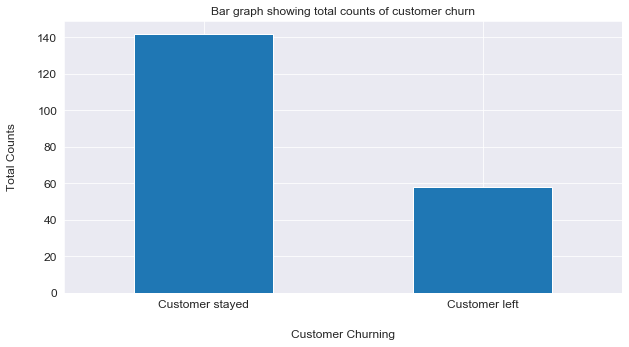

0    71.0
1    29.0
Name: churn, dtype: float64


In [8]:
# showing target variable
fig, ax1 = plt.subplots(figsize=(10,5))
data['churn'].value_counts().plot(kind='bar',
                               title='Bar graph showing total counts of customer churn',
                               fontsize=12);

# labels on x axis
plt.xlabel('Customer Churning', 
           fontsize=12, 
           labelpad=20)
# labels on y axis
plt.ylabel("Total Counts", 
           fontsize=12, 
           labelpad=20)
# changing values of xticks
ax1.set_xticklabels(['Customer stayed', 'Customer left'], 
                    rotation=0)
plt.show()
print(data['churn'].value_counts(normalize=True) * 100)

**By the bar chart above, customers are 29% likely to leave the company**

### Scatterplot to show customer churn based on age and income

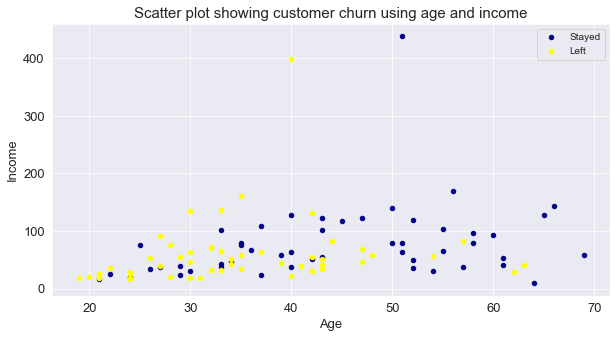

In [9]:
# plotting customers that stayed with the company in darkblue
ax1 = data[data['churn'] == 0][0:50].plot(kind='scatter',
                                      x='age',
                                      y='income',
                                      color='DarkBlue', 
                                      label='Stayed',
                                      figsize=(10,5),
                                      fontsize=13);
# plotting customers that left the company with yellow
data[data['churn'] == 1][0:50].plot(kind='scatter',
                                x='age',
                                y='income',
                                color='Yellow', 
                                label='Left', 
                                ax=ax1);
plt.title('Scatter plot showing customer churn using age and income', fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Income', fontsize=13)
plt.show()

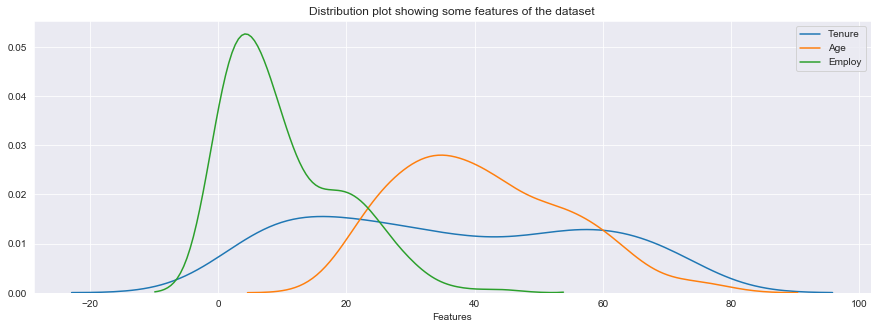

In [10]:
# distribution plots of a few of the features
plt.figure(figsize=(15,5));
ax1 = sns.distplot(data['tenure'], hist=False, label='Tenure');
sns.distplot(data['age'], ax=ax1, hist=False, label='Age')
sns.distplot(data['employ'], ax=ax1, hist=False, label='Employ')
plt.title('Distribution plot showing some features of the dataset')
plt.xlabel('Features')
plt.show()

### Data needs to be normalized when splitting dataset for the best results

In [11]:
# show the correlation between features and target variable
data.corr()['churn'].sort_values()

tenure     -0.376860
employ     -0.337969
loglong    -0.336869
callcard   -0.311451
longten    -0.294906
longmon    -0.292026
age        -0.287697
address    -0.260659
cardten    -0.228634
cardmon    -0.177163
lninc      -0.117459
income     -0.090790
confer     -0.081361
logtoll    -0.070156
tollten    -0.059482
callwait   -0.052885
tollmon     0.014356
custcat     0.014839
pager       0.124623
voice       0.142315
wireless    0.174356
wiremon     0.177483
ed          0.216112
internet    0.254838
ebill       0.254838
equipmon    0.255348
equip       0.275284
churn       1.000000
Name: churn, dtype: float64

## Feature Selection

In [12]:
# creating new dataframe considing of features and target variable
df = data[['tenure', 'employ', 'loglong', 'callcard', 'longten', 'age', 
         'address', 'cardten', 'ed', 'internet', 'wireless',
         'ebill', 'equipmon', 'equip', 'churn']]
df.head()

,tenure,employ,loglong,callcard,longten,age,address,cardten,ed,internet,wireless,ebill,equipmon,equip,churn
0,11.0,5.0,1.482,1.0,42.00,33.0,7.0,125.0,5.0,0.0,1.0,0.0,0.0,0.0,1
1,33.0,0.0,2.246,0.0,288.80,33.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
2,23.0,2.0,1.841,0.0,157.05,30.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,38.0,10.0,1.800,1.0,239.55,35.0,5.0,880.0,2.0,1.0,1.0,1.0,50.1,1.0,0
4,7.0,15.0,1.960,1.0,47.45,35.0,14.0,145.0,2.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
# new shape of dataset
df.shape

(200, 15)

In [14]:
# features
X = df.drop(columns=['churn'])
# target
Y = df['churn'].values

print(X.shape, Y.shape)

(200, 14) (200,)


# Building Logistic Regression Model

In [15]:
# import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

# importing necessary libraries for metrics
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, recall_score, precision_score, roc_curve

### Splitting data into training and testing sets

In [16]:
# splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 14) (160,)
(40, 14) (40,)


### Normalizing data (using MinMaxScaler) for best results

In [17]:
# for the best results using a SVM classifier, data should be normalized for best results
# creating scale object 
scale = MinMaxScaler()
# fit and transforms on training data
x_train_scaled = scale.fit_transform(x_train)
# transforming testing data
x_test_scaled = scale.transform(x_test)

### Finding optimum parameters for the model

In [18]:
# solvers
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# C values
c_values = [0.01, 0.1, 1, 5, 10, 20]

# accuracy scores
acc = np.zeros(len(solvers)*len(c_values) +1)
# precision scores
rec = np.zeros(len(solvers)*len(c_values) +1)
# roc scores
roc = np.zeros(len(solvers)*len(c_values) +1)

#initializing n variable
n = 0

for s in solvers:
    
    for c in c_values:
        
        # logistic regression object 
        logreg = LogisticRegression(solver=s, C=c, max_iter=1000)
        # fitting logreg object with training set
        logreg.fit(x_train_scaled, y_train)
        # predictions
        yhat = logreg.predict(x_test_scaled)
        
        # metrics
        acc[n] = logreg.score(x_test_scaled, y_test)
        rec[n] = recall_score(y_test, yhat)
        roc[n] = roc_auc_score(y_test, yhat)
        
        print(n, '- Solver: ', s, 
             ' C: ', c)
        n+=1

0 - Solver:  newton-cg  C:  0.01
1 - Solver:  newton-cg  C:  0.1
2 - Solver:  newton-cg  C:  1
3 - Solver:  newton-cg  C:  5
4 - Solver:  newton-cg  C:  10
5 - Solver:  newton-cg  C:  20
6 - Solver:  lbfgs  C:  0.01
7 - Solver:  lbfgs  C:  0.1
8 - Solver:  lbfgs  C:  1
9 - Solver:  lbfgs  C:  5
10 - Solver:  lbfgs  C:  10
11 - Solver:  lbfgs  C:  20
12 - Solver:  liblinear  C:  0.01
13 - Solver:  liblinear  C:  0.1
14 - Solver:  liblinear  C:  1
15 - Solver:  liblinear  C:  5
16 - Solver:  liblinear  C:  10
17 - Solver:  liblinear  C:  20
18 - Solver:  sag  C:  0.01
19 - Solver:  sag  C:  0.1
20 - Solver:  sag  C:  1
21 - Solver:  sag  C:  5
22 - Solver:  sag  C:  10
23 - Solver:  sag  C:  20
24 - Solver:  saga  C:  0.01
25 - Solver:  saga  C:  0.1
26 - Solver:  saga  C:  1
27 - Solver:  saga  C:  5
28 - Solver:  saga  C:  10
29 - Solver:  saga  C:  20


In [19]:
# finding positions of the parameter using accuracy, recall, and roc-score 
print('Accuracy: ', acc.argmax())
print('\nRecall Score: ', rec.argmax())
print('\nROC Score: ', roc.argmax())

Accuracy:  0

Recall Score:  3

ROC Score:  4


#### The best parameters are either at position 0 ('newton-cg', 0.01) or at position 3 ('newton-cg', 5), or at position 4 ('newton-cg', 10).  

Evaluate further to find optimum parameter

In [20]:
print('Accuracy: ', acc[:7])
print('\nRecall score: ', rec[:7])
print('\nROC Score: ', roc[:7])

Accuracy:  [0.775 0.775 0.725 0.75  0.775 0.75  0.775]

Recall score:  [0.         0.22222222 0.33333333 0.55555556 0.55555556 0.55555556
 0.        ]

ROC Score:  [0.5        0.57885305 0.58602151 0.68100358 0.69713262 0.68100358
 0.5       ]


#### Evaluation on parameters     

**At position 0:**  
* Accuracy: 77.5%  
* Recall-score: 0%  
* ROC-score: 50%

**At position 3:**  
* Accuracy: 75%  
* Recall-score: 55.55%
* ROC-score: 68.1% 

**At position 4:**  
* Accuracy: 77.5%  
* Recall-score: 55.5%
* ROC-score: 69.71%  

 
  
  
#### Conclusion  

At position 4, roc, recall and accuracy scores are maximized. However, these numbers indicate that there must be better feature selection or a different ML algortihm must be used

Optimal Parameters: Solver='newton-cg', C=10

### Building Final Logistic Regression Model

In [21]:
# logistic regression object
logreg = LogisticRegression(solver='newton-cg', C=10, max_iter=10000)
# fitting model
logreg.fit(x_train_scaled, y_train)
# prediction
yhat = logreg.predict(x_test_scaled)
# probability
yhat_proba = logreg.predict_proba(x_test_scaled)[:,1]

### Model Evaluation

              precision    recall  f1-score   support

      Stayed       0.87      0.84      0.85        31
        Left       0.50      0.56      0.53         9

    accuracy                           0.78        40
   macro avg       0.68      0.70      0.69        40
weighted avg       0.78      0.78      0.78        40

AxesSubplot(0.125,0.125;0.62x0.755)
Accuracy:  77.5 %
Recall:  55.5556 %
ROC score:  69.7133 %


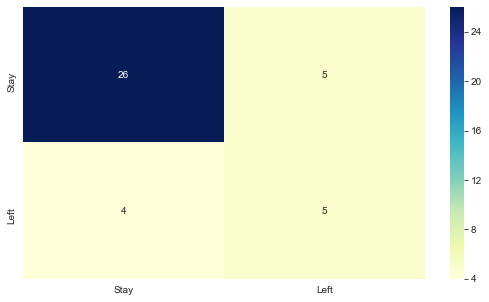

In [22]:
# classification report
report = classification_report(y_test, yhat, target_names=['Stayed', 'Left'])
print(report)

# confusion matrix
matrix = confusion_matrix(y_test, yhat)
# heatmap for matrix
plt.figure(figsize=(9,5));
hmap = sns.heatmap(pd.DataFrame(matrix), 
                   annot=True, 
                   fmt='.2g',
                   xticklabels=['Stay', 'Left'],
                   cmap='YlGnBu',
                   yticklabels=['Stay', 'Left']);

print(hmap)

# metric evaluation
# accuracy
acc_final = round(logreg.score(x_test_scaled, y_test) * 100, 4)
# recall 
recall_final = round(recall_score(y_test, yhat) * 100, 4)
# roc score
roc_final = round(roc_auc_score(y_test, yhat) * 100, 4)

print('Accuracy: ', acc_final, '%')
print('Recall: ', recall_final, '%')
print('ROC score: ', roc_final, '%')

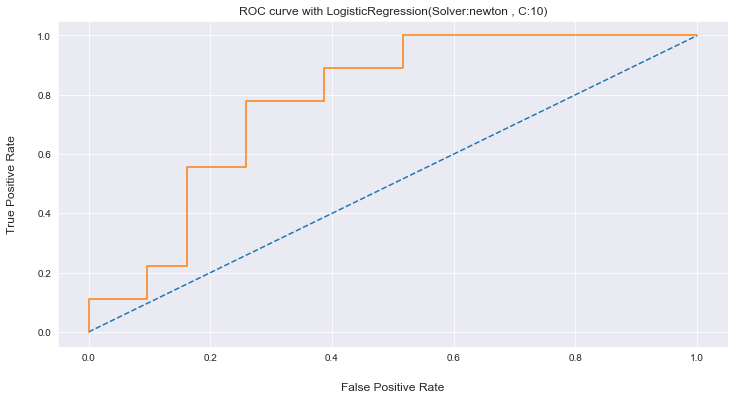

In [23]:
# showing roc_auc_curve
fpr, tpr, thresholds = roc_curve(y_test, yhat_proba)

# plotting roc_auc_curve
fig, ax1 = plt.subplots(figsize=(12,6));
plt.plot([0,1],[0,1],'--')
plt.plot(fpr, tpr)
# labels on x axis
plt.xlabel('False Positive Rate', 
           fontsize=12, 
           labelpad=20)
# labels on y axis
plt.ylabel("True Positive Rate", 
           fontsize=12, 
           labelpad=20)
plt.title('ROC curve with LogisticRegression(Solver:newton , C:10)')
plt.show()

### Using GridSearch to find optimum parameters

In [24]:
from sklearn.model_selection import GridSearchCV
log = LogisticRegression(max_iter=10000)

parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'C': [0.01, 0.1, 0.5, 1, 5, 10, 20]}

grid = GridSearchCV(log, 
                    param_grid=parameters, 
                    scoring='recall', 
                    cv=5, 
                    iid=False)
# fitting grid
grid.fit(x_train_scaled, y_train)
# predictions
yhat_grid = grid.predict(x_test_scaled)

In [25]:
print(grid.best_params_)

{'C': 5, 'solver': 'newton-cg'}


In [26]:
grid_score = round(grid.score(x_test_scaled, y_test) * 100, 4)
grid_recall = round(recall_score(y_test, yhat_grid) * 100, 4)
grid_roc = round(roc_auc_score(y_test, yhat_grid) * 100, 4)

print('Accuracy: ', grid_score, '%')
print('Recall: ', grid_recall, '%')
print('ROC score: ', grid_roc, '%')

Accuracy:  55.5556 %
Recall:  55.5556 %
ROC score:  68.1004 %


### Final Evaluation on GridSearch and inital LogisticRegression   

**GridSearch Metrics:**   

* Accuracy:  55.5556 %
* Recall:  55.5556 %
* ROC score:  68.1004 %   

**LogisticRegression Metrics:**   

* Accuracy:  77.5 %
* Recall:  55.5556 %
* ROC score:  69.7133 %   


### Conclusion   

Our model achieved a higher accuracy and ROC score than the GridSearchCV method. Both models found an equal recall rate of 55.5556%.   

By using GridSearch, it found the optimal parameters as: Solver='newton-cg', and C=5.  
The inital method in finding parameters found: Solver='newtown-cg', and C=10.  

Ultimately, the goal is to find the customers that are leaving the company. Thus a higher recall rate must be achived than what the models found. Thus, a different ML algorithm should be used to get better results.  
